In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dict_dtype = {'Item_Number':str,
'Bottle_Volume (ml)':int,
'Bottles_Sold':int,
'Bottle_Retail':float,
'Store_Number':int}

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
products = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\clustering_data_num_unique_stores.csv',dtype=dict_dtype, index_col=0)

In [6]:
products.rename({'Store_Number':'Num_Stores_Selling'} ,axis=1, inplace=True)
              

In [7]:
products2 = products.copy()

In [8]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4475 entries, 0 to 4474
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4475 non-null   object 
 1   Item_Description    4475 non-null   object 
 2   Bottle_Volume       4475 non-null   int64  
 3   New_Category_Name   4475 non-null   object 
 4   Bottle_Retail       4475 non-null   float64
 5   Bottles_Sold        4475 non-null   int32  
 6   Num_Stores_Selling  4475 non-null   int32  
 7   Sales               4475 non-null   float64
dtypes: float64(2), int32(2), int64(1), object(3)
memory usage: 279.7+ KB


In [9]:
products.describe()

,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,Sales
count,4475.000000,4475.000000,4.475000e+03,4475.000000,4.475000e+03
mean,792.361564,31.221806,6.930340e+03,125.248045,9.480072e+04
std,410.724957,69.350753,3.972229e+04,214.229508,3.889196e+05
min,20.000000,0.990000,1.000000e+00,1.000000,7.500000e+00
25%,750.000000,11.799501,5.250000e+01,3.000000,1.395540e+03
50%,750.000000,20.250000,5.470000e+02,49.000000,1.304100e+04
75%,750.000000,35.000000,3.622000e+03,154.000000,5.269973e+04
max,5250.000000,2963.694000,2.105088e+06,1725.000000,1.062280e+07


In [10]:
products.shape

(4475, 8)

<AxesSubplot:xlabel='Bottle_Retail', ylabel='Count'>

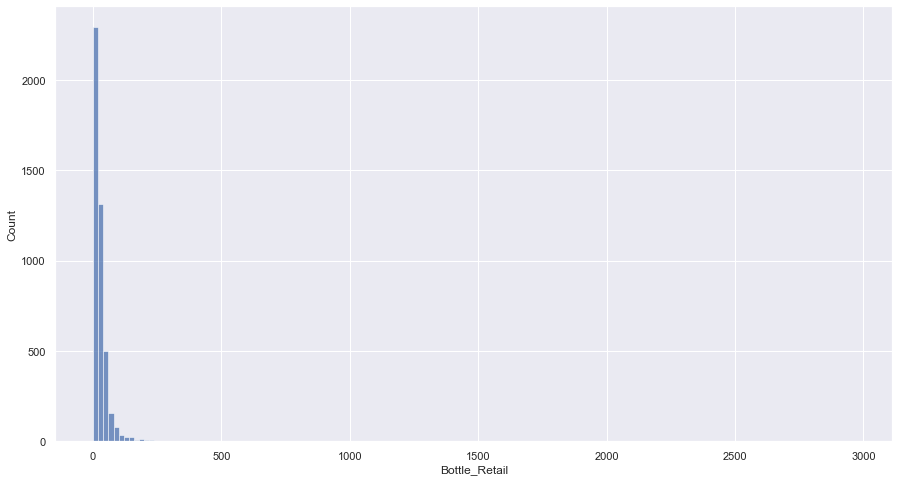

In [11]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(products['Bottle_Retail'], bins=150)


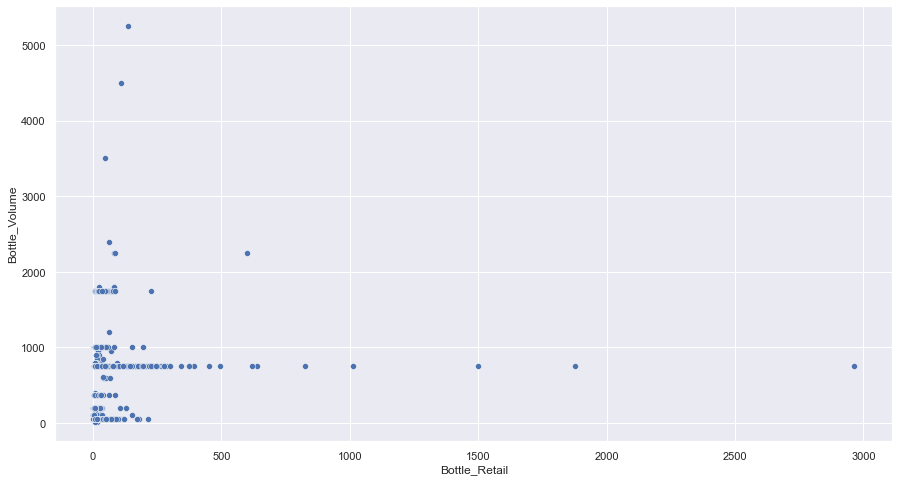

In [12]:
# products.plot.scatter(x='Bottle_Volume', y='Bottle_Retail')
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottle_Volume')
# gfg.set_ylim(0, 80)
# gph.set_xlim(0.98,3000)
# gph.set_xticks(range(0.98,3000))
plt.show()

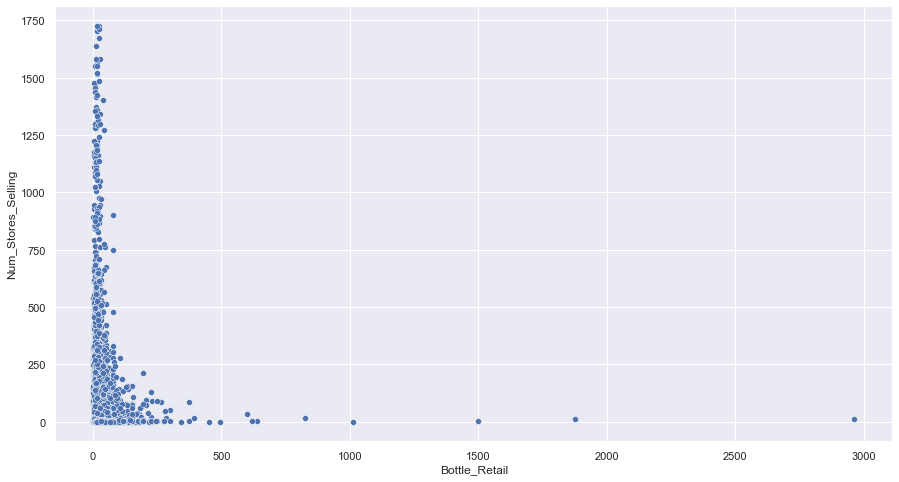

In [13]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Num_Stores_Selling')

In [14]:
products.Bottle_Retail.corr((products.Bottle_Volume))

0.012858551897243728

In [15]:
products.Bottle_Retail.corr((products.Bottles_Sold))

-0.04408941079679311

In [16]:
products.Bottles_Sold.corr((products.Bottle_Volume))

-0.000152168220141047

In [17]:
products.Bottles_Sold.corr((products.Num_Stores_Selling))

0.45378226327407434

In [18]:
filt = products.Bottle_Retail > 1400
products[filt]

,Item_Number,Item_Description,Bottle_Volume,New_Category_Name,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,Sales
1636,48725,Remy Martin Louis XIII,750,Brandies,2963.694,17,12,50977.11
3330,917673,HA Double Eagle Very Rare,750,Bourbon,1500.000,2,2,3000.00
3367,919976,HA OFC Bourbon 1995,750,Bourbon,1875.000,10,10,18750.00


In [19]:
filt2 = products.Bottle_Volume > 3000
products[filt2]

,Item_Number,Item_Description,Bottle_Volume,New_Category_Name,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,Sales
0,100015,Fireball Cinnamon Whiskey Bag in Box,3500,Liquers,45.0,1123,129,50535.0
139,101515,Fireball Cinnamon Whiskey Keg,5250,Temporary & Specialty Packages,138.0,180,141,24895.5
155,101665,Stumpys Spirits Cocktail Collection Gift Set,4500,Temporary & Specialty Packages,108.0,115,26,12420.0


In [20]:
np.sum(products.Bottles_Sold)

31013272

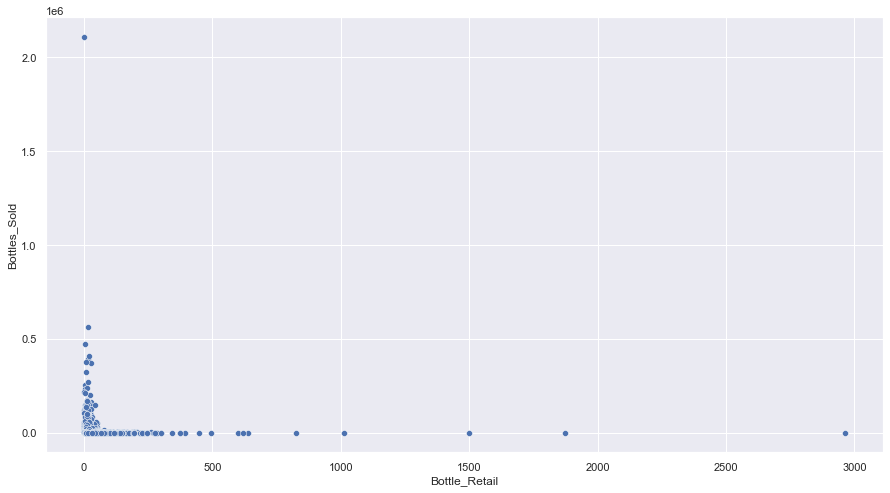

In [21]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottles_Sold')
# gfg.set_ylim(0, 80)

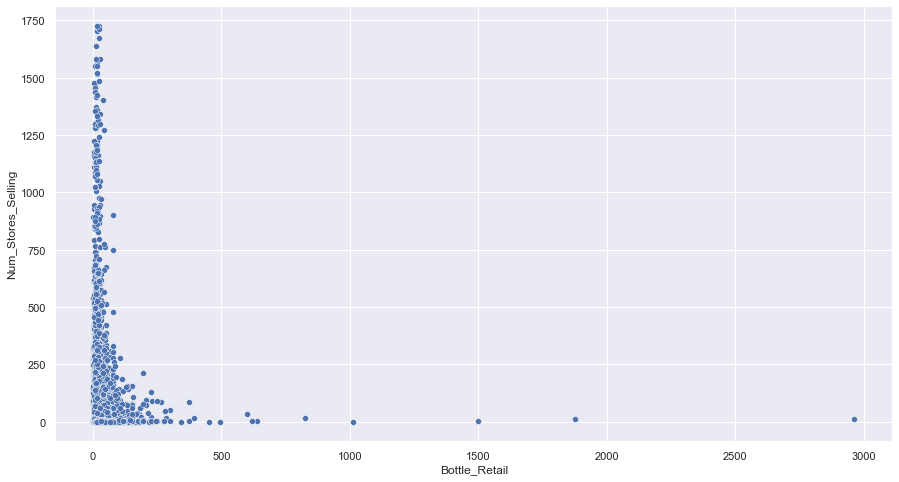

In [35]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Num_Stores_Selling')

remove outliers

In [23]:
filt = products2.Bottle_Retail > 1400 #drop outliers of Bottle Retail

In [24]:
products2[filt]

,Item_Number,Item_Description,Bottle_Volume,New_Category_Name,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,Sales
1636,48725,Remy Martin Louis XIII,750,Brandies,2963.694,17,12,50977.11
3330,917673,HA Double Eagle Very Rare,750,Bourbon,1500.000,2,2,3000.00
3367,919976,HA OFC Bourbon 1995,750,Bourbon,1875.000,10,10,18750.00


In [25]:

products2 = products2[~filt]

In [26]:
products2.shape

(4472, 8)

In [27]:
filt2 = products2.Bottle_Volume > 3000 #drop outliers of Bottle Volume

In [28]:
products2 = products2[~filt2] 

In [29]:
products2.shape

(4469, 8)

In [30]:
filt3= products2.Item_Number == '64870'  #outlier of bottles sold

In [31]:
products2[filt3]

,Item_Number,Item_Description,Bottle_Volume,New_Category_Name,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,Sales
2035,64870,Fireball Cinnamon Whiskey,100,Liquers,1.35,2105088,893,2841868.8


In [32]:
# products2[filt3]


products2 = products2[~filt3]

scale data for clustering

In [33]:
products2.shape

(4468, 8)

In [34]:
stop # cols_to_scale = ['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']

NameError: name 'stop' is not defined

In [37]:
scaler = StandardScaler()

In [38]:


products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Stores_Sold_scaled' ]] = scaler.fit_transform\
                                           (products2[['Bottle_Volume', 'Bottle_Retail', 'Num_Stores_Selling']])
                                                   

products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Stores_Sold_scaled']].describe()

,Bottle_Volume_scaled,Bottle_Retail_scaled,Stores_Sold_scaled
count,4.468000e+03,4.468000e+03,4.468000e+03
mean,-8.281946e-16,2.062768e-16,-1.250865e-16
std,1.000112e+00,1.000112e+00,1.000112e+00
min,-1.927429e+00,-7.107662e-01,-5.801423e-01
25%,-1.003907e-01,-4.443961e-01,-5.707982e-01
50%,-1.003907e-01,-2.353852e-01,-3.558836e-01
75%,-1.003907e-01,1.286786e-01,1.358504e-01
max,4.029217e+00,2.425562e+01,7.474484e+00


In [39]:
# model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Stores_Sold_scaled' ]


determine optimal number of clusters

In [40]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Stores_Sold_scaled' ]

df_scaled = products2[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.538657720538851
number of clusters =  3   silhouette score =  0.5675553944252332
number of clusters =  4   silhouette score =  0.5919661072064683
number of clusters =  5   silhouette score =  0.5178079812674802
number of clusters =  6   silhouette score =  0.526841632994984
number of clusters =  7   silhouette score =  0.5110117311185164
number of clusters =  8   silhouette score =  0.46360989269085084
number of clusters =  9   silhouette score =  0.4379293098356872
number of clusters =  10   silhouette score =  0.44305307098015323


In [41]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

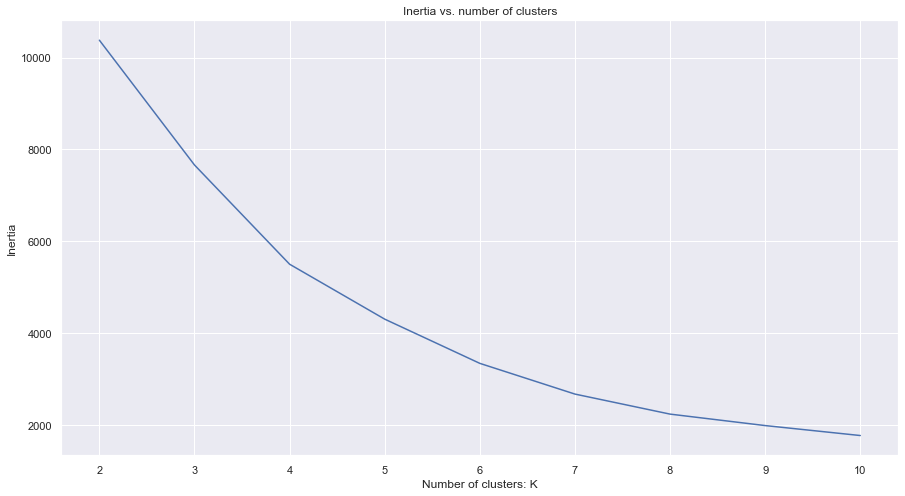

In [42]:

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

get four clusters

In [43]:


cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Stores_Sold_scaled' ]


model = KMeans(n_clusters=4, random_state=42)

model.fit(products2[cluster_cols])

products2['product_cluster'] = model.predict(products2[cluster_cols])

In [47]:
products2.groupby(['product_cluster']).agg({'Sales':'sum', 'Bottle_Volume' : ['mean','median'], 'Bottle_Retail':'mean','Num_Stores_Selling':'mean' })

Sales Bottle_Volume         Bottle_Retail  \
                          sum          mean  median          mean   
product_cluster                                                     
0                1.932673e+08    582.860262   750.0     15.141642   
1                1.567583e+08    687.578933   750.0     26.965645   
2                1.684475e+06    753.125000   750.0    239.992294   
3                6.952072e+07   1754.362416  1750.0     23.094512   

                Num_Stores_Selling  
                              mean  
product_cluster                     
0                       846.371179  
1                        81.073276  
2                        26.837500  
3                       139.512304

In [ ]:
products2.head()

In [ ]:
products2.info()

In [ ]:
products2['Bottle_Volume_liters'] = products2.Bottle_Volume / 1000

# Name Clusters

In [ ]:
prod_dict = {0:'Volume_For_Dollar', 1:'Everything_Else', 2:'Popular_Bottles',3:'High End'}

In [ ]:
products2[['product_cluster']].apply(lambda p: prod_dict[p[0]],axis=1)

Name Product Clusters

In [ ]:
products2['cluster_name'] = products2['product_cluster'].apply(lambda p: prod_dict[p])

In [ ]:
products2.cluster_name

In [ ]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume_liters' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

In [48]:
products2.groupby(['product_cluster']).agg({'Sales':'sum', 'Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

Sales Bottle_Volume                            \
                          sum           min   max         std  median   
product_cluster                                                         
0                1.932673e+08            50  1750  402.252984   750.0   
1                1.567583e+08            20  1200  235.387565   750.0   
2                1.684475e+06            50  2250  258.200166   750.0   
3                6.952072e+07          1750  2400   45.639288  1750.0   

                             Bottle_Retail                                    \
                        mean           min          max         std   median   
product_cluster                                                                
0                 582.860262          1.70    77.490000   10.939436   12.380   
1                 687.578933          0.99   132.510000   21.435703   21.000   
2                 753.125000        134.99  1012.500000  153.509374  187.495   
3                1754.362416          7.34    87.247228   15.441111   17.250   

                            Num_Stores_Selling                           \
                       mean                min   max         std median   
product_cluster                                                           
0                 15.141642                437  1725  354.608800  706.0   
1                 26.965645                  1   472  100.011581   38.5   
2                239.992294                  1   212   40.670471    4.5   
3                 23.094512                  1   762  161.112164   75.0   

                             
                       mean  
product_cluster              
0                846.371179  
1                 81.073276  
2                 26.837500  
3                139.512304

In [ ]:
products2.groupby(['cluster_name']).agg({'Bottle_Volume_liters' :['min','max', 'mean'], 'Bottle_Retail':['min','max', 'mean'],'Bottles_Sold':['min','max', 'mean'] })

In [ ]:
products2['price_per_ml'] = products2['Bottle_Retail'] / products2['Bottle_Volume']

In [ ]:
products2.groupby(['cluster_name']).agg({'Bottle_Volume':'nunique'})

In [ ]:
# products2['revenue'] = products2.Bottles_Sold * products2.Bottle_Retail


In [ ]:
df = products2.groupby(['cluster_name']).agg({'Sales':'sum'})
df.style.format("{:.0f}")


In [ ]:
from freq_pd import proc_freq

In [ ]:
proc_freq(products2,'cluster_name')

In [ ]:
products2.groupby(['cluster_name']).agg({'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
products2.groupby(['cluster_name']).agg({'revenue':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
products2.groupby(['cluster_name']).agg({'Sales':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
pd.set_option('display.max_columns', None)
products2.groupby(['cluster_name']).agg({'Item_Number':['nunique'],'Sales':['sum'],'Bottle_Volume':['count','nunique','min','max','median','std'],'Bottle_Retail':['min','max','std', 'median', 'mean'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
products2.cluster_name.value_counts()

In [ ]:
# df.sort_values(by=['Population'], ascending=False)
products2.sort_values(by=['revenue'], ascending=False)
products2[['cluster_name','Sales','Item_Description','Bottle_Retail','Bottle_Volume']].sort_values(by=['Sales'], ascending=False)
# products2.style.format("{:.0f}")


In [ ]:
products2.loc[products2.product_cluster==3,:]['Bottle_Retail'].max()

In [ ]:
# products2.loc[products2.product_cluster==1,:]

In [ ]:
products_out=products2[['Item_Number','Item_Description','Bottle_Volume','Bottle_Retail', 'Bottles_Sold','cluster_name','Sales','Num_Stores_Selling','New_Category_Name']]

In [ ]:
products_out.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv')